<h1>Exploring FBI Gun Data</h1>

This project explores the FBI gun dataset which includes data on firearm background checks made in US. Although a one on one correlation can't be made between a firearm background check and a firearm sale due to varying state laws, the statistics are still widely accepted as the best proxy for total gun sales. We will also explore it's relationship with the census data. The FBI gun dataset and census dataset are two separate datasets.

Some of the questions we would like to answer from this data are:
<h4>
1. Which states have the most firearm background checks in 2016?<br /><br />
2. Which state have the most firearm sales per capita in 2016?<br /><br />
3. How do gun sales vary throughout the year? Do they increase/decrease at a certain time of the year?<br /><br />
4. Is there a strong correlation between some of the census variables like population and the number of gun sales?</h4>

<h2>Data Wrangling</h2>

Let's first take a look at how these two datasets look like and perform some cleanup before data exploration.

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [337]:
gun_data = pd.read_excel("gun_data.xlsx")

In [338]:
census_data = pd.read_csv("U.S. Census Data.csv")

In [339]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [340]:
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [341]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [342]:
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

There are 12485 entries in the dataset and for some of the columns more than 70% values are missing. I am going to remove these columns from my dataframe for most of my analysis as these will not give substantial information. The columns to let go are:

permit_recheck
returned_handgun
returned_long_gun
returned_other
rentals_handgun
rentals_long_gun
private_sale_handgun
private_sale_long_gun
private_sale_other
return_to_seller_handgun
return_to_seller_long_gun
return_to_seller_other

In [343]:
gun_data = gun_data.drop(['permit_recheck','returned_handgun', 'returned_long_gun','returned_other','rentals_handgun',
                          'rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other',
                          'return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'], axis=1)

Let's also replace the empty values with 0.

In [344]:
gun_data= gun_data.fillna(0)


The 'month' column in the dataset is a combination of both month and year. We can split this into year and month for our analysis

In [345]:
#Create two column for month and year seperately from the date column (that column is actually labeled as month but is year-month both)
gun_data['months'] = gun_data['month'].apply(lambda x: x.split("-")[1]).astype(int)

In [346]:
gun_data['year'] = gun_data['month'].apply(lambda x: x.split("-")[0]).astype(int)

In [347]:
gun_data[('year')].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: int32

In [348]:
gun_data[('months')].head()

0    9
1    9
2    9
3    9
4    9
Name: months, dtype: int32

<h2>Census data</h2>

Similarly let's clean the census dataset too.

In [349]:
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

We can drop the Fact Note column as it's empty.

In [350]:
#Drop Fact Note as it's empty
census_data = census_data.drop('Fact Note', axis = 1)
census_data = census_data[0:65]
census_data.head()


,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Consider only first 65 rows as others don't contain relevant data.

In [351]:
census_data = census_data[0:65]
census_data['Fact'].count()

65

The census data contains many non numeric characters like %, $ etc. and we should remove it as we need numeric data for analysis.

In [352]:
states=['Alabama','Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']

In [353]:
for state in states:
    census_data[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    # remove all the non digit character
    census_data[state]=pd.to_numeric(census_data[state], downcast='float', errors='ignore')
    
census_data.head()
census_data.dtypes

Fact               object
Alabama           float32
Alaska            float32
Arizona           float32
Arkansas          float32
California        float32
Colorado          float32
Connecticut       float32
Delaware          float32
Florida           float32
Georgia           float32
Hawaii            float32
Idaho             float32
Illinois          float32
Indiana           float32
Iowa              float32
Kansas            float32
Kentucky          float32
Louisiana         float32
Maine             float32
Maryland          float32
Massachusetts     float32
Michigan          float32
Minnesota         float32
Mississippi       float32
Missouri          float32
Montana           float32
Nebraska          float32
Nevada            float32
New Hampshire     float32
New Jersey        float32
New Mexico        float32
New York          float32
North Carolina    float32
North Dakota      float32
Ohio              float32
Oklahoma          float32
Oregon            float32
Pennsylvania

Note that the values in columns with % sign get multiplied by 100.

We shall also take the transpose of the census dataframe to merge it with gun data.

In [354]:
census_data.set_index('Fact',inplace=True)
census_T = census_data.T.reset_index()
census_T.rename(columns={'index':'state'},inplace = True)
census_T.head(50)
#census_T.dtypes

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,1.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,2.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0,4.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0,5.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0,6.0
5,Colorado,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,2440.0,1340.0,...,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,485.0,10364189.0,8.0
6,Connecticut,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,2290.0,1610.0,...,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,7381.0,484236.0,9.0
7,Delaware,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,2290.0,1750.0,...,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,4608.0,194854.0,10.0
8,Florida,20612440.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,2130.0,1990.0,...,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,3506.0,5362476.0,12.0
9,Georgia,10310371.0,9688680.0,640.0,9687653.0,640.0,710.0,2440.0,2570.0,1310.0,...,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,1684.0,5751349.0,13.0


We shall now merge the census data and gun data dataframes
Before doing that we need to consolidate gun data into a single row for each state.

In [355]:
guns = gun_data.groupby(['year','state'])['totals'].sum().reset_index()
result = guns.merge(census_T, on='state', how='inner')
result.columns.get_values()

array(['year', 'state', 'totals',
       'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian a

<h2>Data Exploration</h2>

<h3>Do the gun sales vary throughout the year?</h3>

In [356]:
gun_data.groupby('months')['totals'].sum()

months
1     22594354
2     24386459
3     25357927
4     21322573
5     18918200
6     18567565
7     18724372
8     20866499
9     21622897
10    22460456
11    24479566
12    30321770
Name: totals, dtype: int64

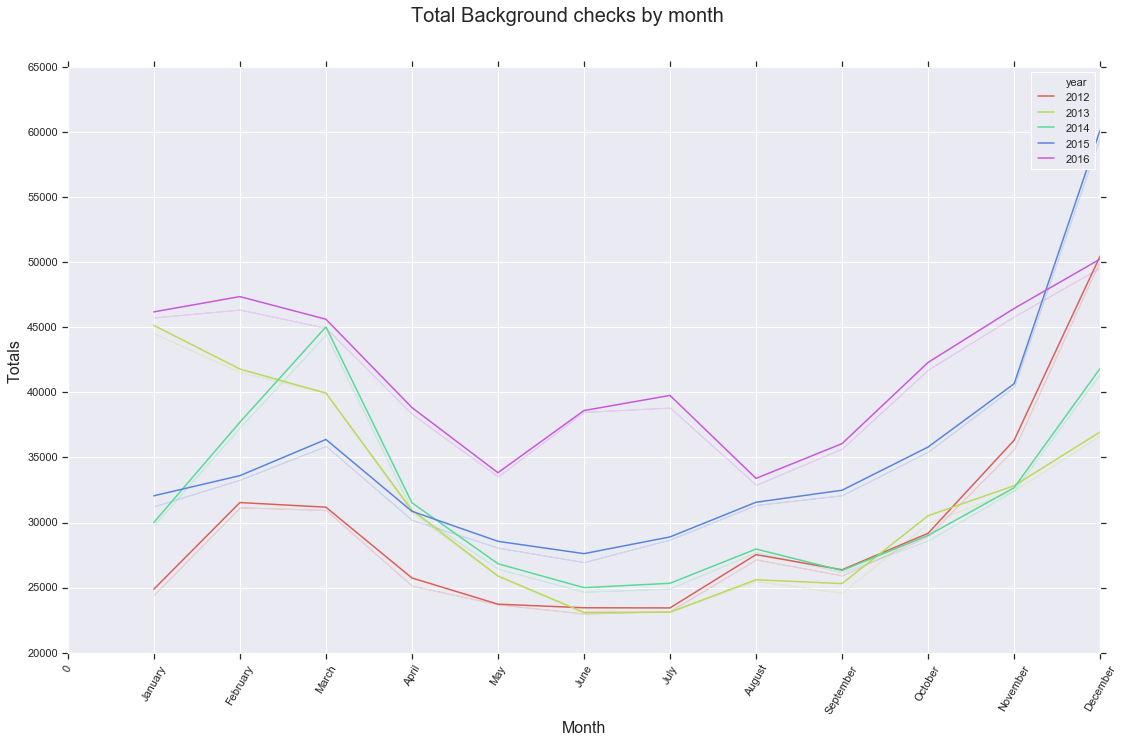

In [357]:
#Use lineplot
gun_data_by_year = gun_data[(gun_data['year'] > 2011) & (gun_data['year'] < 2017) ]
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
sns.set()
s = sns.lineplot(x="months", y="totals", hue="year", ci=0, palette=sns.color_palette('hls', n_colors=5), data=gun_data_by_year)
plt.suptitle('Total Background checks by month', fontsize=20) 
s.set_xlabel("Month", fontsize=16)
s.set_ylabel("Totals", fontsize=16)
s.set_xticks(np.arange(13))
s.set_xticklabels(['0','January','February','March','April','May','June','July','August','September','October','November','December'],
                                         rotation = 60)

It seems from the line plot above that the maximum gun sales happen during late Fall/Winter, the highest being in December for most years. Except 2016, there seems to be a general decline in gun sales during summer months.

<h3>Which are the top 10 states with most gun restrictions in 2016?</h3>

In [358]:
#Most gun restrictions in 2016 top 10 states
result_2016 = result[result['year'] == 2016]
result_2016 = result_2016.groupby(['state'])['totals'].sum().reset_index()
result_2016.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,state,totals
16,Kentucky,3676847
4,California,2377167
12,Illinois,1924070
42,Texas,1721726
13,Indiana,1436725
8,Florida,1435340
37,Pennsylvania,1143220
34,Ohio,875724
41,Tennessee,714774
46,Washington,713996


Kentucky tops the list. Kentucky runs a <a href="https://wfpl.org/kentucky-background-checks-stand-out/">background check</a> every month on every concealed carry license holder, which could explain the comparitively higher numbers.

<h3>Which state had the most firearm sales per capita in 2016?</h3>

In [359]:
#For the tasks below create subset of data using 2016 year filters and then perform operations accordingly
#Find per gun capita using total sales and population estimates
result_2016 = result[result['year'] == 2016]

result_2016['Gun_Per_Capita_2016'] = result_2016['totals']*100/result_2016['Population estimates, July 1, 2016,  (V2016)']
result_2016.head()
result_2016_per_capita = result_2016.filter(['state','totals','Gun_Per_Capita_2016'], axis=1)
result_2016_per_capita.sort_values(by=['Gun_Per_Capita_2016'], axis = 0, ascending = False).head(10)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,state,totals,Gun_Per_Capita_2016
338,Kentucky,3676847,82.868347
278,Indiana,1436725,21.660086
258,Illinois,1924070,15.029990
958,West Virginia,242350,13.235199
518,Montana,136337,13.077639
818,South Dakota,111921,12.932056
18,Alabama,616947,12.685769
578,New Hampshire,165164,12.373735
38,Alaska,87647,11.813952
458,Minnesota,651599,11.804432


<h3>Correlation between gun sales and census variables</h3>

Next let's examine correlation between some of the census variables and gun sales. What is the relationship between population and gun sales? Also I would like to find out how the income affects gun sales? I am also interested in finding if number of veterans and gun sales are positively correlated?

In [360]:
#Get values in one list of all census data columns
dict_census_vars = {}
dict_census_vars = census_T.columns.values.tolist()
dict_census_vars

['state',
 'Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V20

In [361]:
#calculate Pearson's coefficient
def correlation(x, y):
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    x_mean = x.mean()
    y_mean = y.mean()
    correlation = (((x - x_mean)/x_std) * ((y - y_mean)/y_std)).mean()
    return correlation

In [362]:
#Get the totals in one variable
gun_totals_by_state = result.groupby('state')['totals'].sum()
for i in range(64):
    #based on the values from dict_census_vars, i = 0, 20, 47 will give the intended result
    if i in [0,20,47]:
        c_data.iloc[i].fillna(c_data.iloc[i].mean(),inplace=True)        
        corrcoef = correlation(gun_totals_by_state,c_data.iloc[i])  
        
        print(i, round(corrcoef, 5), dict_census_vars[i+1])

(0, 0.6497, 'Population estimates, July 1, 2016,  (V2016)')
(20, 0.67324, 'Veterans, 2011-2015')
(47, -0.21455, 'Median household income (in 2015 dollars), 2011-2015')


A positive correlation is found between Population and gun sales and also between the number of veterans and gun sales. A negative correlation is found between median household income and gun sales. However a strong correlation was not observed between gun sales and any of these variables.

<h2>Conclusion</h2>

Analyzing the FBI Gun data and the census data provides an insight into gun sales between 1997 to 2017 for different states and how they relate to different census variables.

Looking at the gun sales in 2016 it was found that Kentucky, California and Texas top the list. We also found the per capita gun sales in 2016 and found that Kentucky, Indiana and Illinois were the top three. 

An analysis was performed to see how the gun sales varied throughout the year to find if they increase or decrease during some seasons or holidays. It appears from the analysis conducted and the line graph for 2012 to 2016 that the sales tend to increase in winter between November to March and are lowest during summer between May to July. 2015 is an exception though, because we see a peak in June and July. Further analysis is needed to understand why this happens.

The relationship with some census variables was also explored. We found the Pearson's coefficient for correlation and found a weak correlation between gun sales and:<br />
Population estimates, July 1, 2016 (positive)<br />
Veterans (positive)<br />
Median household income (in 2015 dollars), 2011-2015 (negative)

We can explore the relationship between more census variables in future like various ethnic groups to see how they relate to gun sales. We could also explore gun dataset independently to analyze the growth in gun restrictions between 2000 to 2016 for all states to find out how they have changed through the years.

<h2>References</h2>

https://stackoverflow.com/questions/19124601/is-there-a-way-to-pretty-print-the-entire-pandas-series-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/26097916/python-best-way-to-convert-a-pandas-series-into-a-pandas-dataframe?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://stackoverflow.com/questions/34682828/pandas-extracting-specific-selected-columns-from-a-dataframe-to-new-dataframe

https://github.com/BuzzFeedNews/nics-firearm-background-checks

https://wfpl.org/kentucky-background-checks-stand-out/

https://stackoverflow.com/questions/45729609/seaborn-how-to-replace-index-with-text-in-x-axis-in-barplot